In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [35]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [36]:
os.getcwd()

'C:\\Users\\poscoedu_ph\\AI 기초'

In [37]:
df = pd.read_csv('data/hcr.csv',encoding='cp949')
df.head()

,SLAB폭,SLAB길이,SLAB중량,SLAB최초저장위치,연주구분,단위내순서,성분AS,성분C,성분B,성분CA,...,정정_장입LT,장입온도,전저장위치코드,발지야드포인트,스카핑여부,품명,롤단위지정구분,성분V,월구분,정정_압연작업지시LT
0,1570,9970,30.60,3GC,2연주,14.0,0.004,0.0016,0,0,...,8.0,571,3GB,4C,0,FH,NaN,0.002,4,-6.4
1,1020,11860,23.65,2GA,2연주,79.0,0.005,0.0433,0,0,...,13.4,351,3GB,5A,0,HR,D,0.000,10,3.2
2,1500,11810,34.63,3GC,2연주,21.0,0.005,0.0020,0,2,...,7.5,460,3GB,4C,0,CR,F,0.002,4,-7.0
3,1570,9430,28.94,2GC,2연주,17.0,0.004,0.0016,0,0,...,7.8,488,3GB,4C,0,CR,NaN,0.002,4,-6.6
4,1500,11870,34.81,2GC,2연주,25.0,0.004,0.0023,0,0,...,7.2,335,5GG,4C,0,EG,F,0.002,4,-7.5


In [38]:
df.describe(include='number')

,SLAB폭,SLAB길이,SLAB중량,단위내순서,성분AS,성분C,성분B,성분CA,성분CU,성분CR,...,성분TOTALAL,성분SOLAL,평균TS,전단_정정LT,정정_장입LT,장입온도,스카핑여부,성분V,월구분,정정_압연작업지시LT
count,113367.000000,113367.000000,113367.000000,113348.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,...,113367.000000,113367.000000,113349.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000
mean,1245.324565,10003.416726,24.296319,42.209549,0.005251,0.050292,1.113702,0.568993,0.018519,0.020830,...,0.027773,0.026294,361.314798,1.007894,9.409730,478.433848,0.105004,0.000495,6.607337,-0.262513
std,162.968327,1424.983418,4.864720,25.927490,0.000963,0.044670,3.560982,2.770710,0.015485,0.015112,...,0.006527,0.006446,76.786241,4.905946,17.629108,134.516622,0.306560,0.000759,3.498757,17.696264
min,900.000000,5000.000000,10.090000,1.000000,0.000000,0.001000,0.000000,0.000000,0.005000,0.010000,...,0.010000,0.008000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,1.000000,-16.100000
25%,1110.000000,9000.000000,20.770000,20.000000,0.005000,0.031100,0.000000,0.000000,0.012000,0.020000,...,0.023000,0.022000,320.000000,0.000000,5.800000,377.000000,0.000000,0.000000,4.000000,-3.700000
50%,1260.000000,10040.000000,23.610000,40.000000,0.005000,0.039200,0.000000,0.000000,0.015000,0.020000,...,0.027000,0.026000,336.000000,0.000000,8.600000,480.000000,0.000000,0.000000,7.000000,-0.900000
75%,1360.000000,11380.000000,27.750000,61.000000,0.006000,0.060200,0.000000,0.000000,0.020000,0.020000,...,0.032000,0.030000,418.000000,0.000000,12.100000,582.000000,0.000000,0.001000,10.000000,2.300000
max,1570.000000,11880.000000,35.000000,142.000000,0.008000,0.212500,21.000000,124.000000,0.300000,0.420000,...,0.061000,0.059000,608.000000,678.400000,4026.900000,893.000000,1.000000,0.005000,12.000000,4011.200000


In [39]:
df.describe(include='object')
# 전체 데이터에 대한 include는 include='all' 하면 됨

,SLAB최초저장위치,연주구분,재료번호,SLAB번호,HCR실적구분,전저장위치코드,발지야드포인트,품명,롤단위지정구분
count,113195,113367,113367,113367,113367,113342,113365,113367,57427
unique,20,3,113367,113364,2,5,4,10,5
top,2GA,2연주,HQD093840,SQ63808 071,H,5GG,5A,HR,D
freq,49255,113161,1,2,101808,60258,72498,46833,21382


In [40]:
df.shape

(113367, 34)

In [41]:
df.dtypes

SLAB폭            int64
SLAB길이           int64
SLAB중량         float64
SLAB최초저장위치      object
연주구분            object
단위내순서          float64
성분AS           float64
성분C            float64
성분B              int64
성분CA             int64
성분CU           float64
성분CR           float64
성분MO           float64
성분MN           float64
성분N            float64
성분P            float64
성분S            float64
성분TOTALAL      float64
성분SOLAL        float64
평균TS           float64
전단_정정LT        float64
재료번호            object
SLAB번호          object
HCR실적구분         object
정정_장입LT        float64
장입온도             int64
전저장위치코드         object
발지야드포인트         object
스카핑여부            int64
품명              object
롤단위지정구분         object
성분V            float64
월구분              int64
정정_압연작업지시LT    float64
dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113367 entries, 0 to 113366
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SLAB폭        113367 non-null  int64  
 1   SLAB길이       113367 non-null  int64  
 2   SLAB중량       113367 non-null  float64
 3   SLAB최초저장위치   113195 non-null  object 
 4   연주구분         113367 non-null  object 
 5   단위내순서        113348 non-null  float64
 6   성분AS         113367 non-null  float64
 7   성분C          113367 non-null  float64
 8   성분B          113367 non-null  int64  
 9   성분CA         113367 non-null  int64  
 10  성분CU         113367 non-null  float64
 11  성분CR         113367 non-null  float64
 12  성분MO         113367 non-null  float64
 13  성분MN         113367 non-null  float64
 14  성분N          113282 non-null  float64
 15  성분P          113367 non-null  float64
 16  성분S          113367 non-null  float64
 17  성분TOTALAL    113367 non-null  float64
 18  성분SOLAL      113367 non-

In [43]:
df.columns

Index(['SLAB폭', 'SLAB길이', 'SLAB중량', 'SLAB최초저장위치', '연주구분', '단위내순서', '성분AS',
       '성분C', '성분B', '성분CA', '성분CU', '성분CR', '성분MO', '성분MN', '성분N', '성분P',
       '성분S', '성분TOTALAL', '성분SOLAL', '평균TS', '전단_정정LT', '재료번호', 'SLAB번호',
       'HCR실적구분', '정정_장입LT', '장입온도', '전저장위치코드', '발지야드포인트', '스카핑여부', '품명',
       '롤단위지정구분', '성분V', '월구분', '정정_압연작업지시LT'],
      dtype='object')

In [44]:
numeric_vars = []

# 수치형 데이터를 아래와 같이 할 수 도 있지만 한줄로도 가능
# for col in df.columns:
#     if df[col].dtype != 'object':
#         numeric_vars.append(col)
#df = df[numeric_vars]

#위 for, if 대신 아래와 같이 사용 할 수 있다.
df = df.select_dtypes(include='number')
df_obj = df.select_dtypes(include='object')
df

,SLAB폭,SLAB길이,SLAB중량,단위내순서,성분AS,성분C,성분B,성분CA,성분CU,성분CR,...,성분TOTALAL,성분SOLAL,평균TS,전단_정정LT,정정_장입LT,장입온도,스카핑여부,성분V,월구분,정정_압연작업지시LT
0,1570,9970,30.60,14.0,0.004,0.0016,0,0,0.009,0.01,...,0.029,0.026,255.0,0.0,8.0,571,0,0.002,4,-6.4
1,1020,11860,23.65,79.0,0.005,0.0433,0,0,0.017,0.02,...,0.022,0.021,340.0,0.0,13.4,351,0,0.000,10,3.2
2,1500,11810,34.63,21.0,0.005,0.0020,0,2,0.008,0.02,...,0.029,0.026,253.0,0.0,7.5,460,0,0.002,4,-7.0
3,1570,9430,28.94,17.0,0.004,0.0016,0,0,0.009,0.01,...,0.029,0.026,252.0,0.0,7.8,488,0,0.002,4,-6.6
4,1500,11870,34.81,25.0,0.004,0.0023,0,0,0.008,0.02,...,0.029,0.028,253.0,0.0,7.2,335,0,0.002,4,-7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113362,1250,6090,14.88,42.0,0.006,0.1155,0,0,0.016,0.02,...,0.023,0.021,421.0,0.0,7.1,631,0,0.001,10,-2.4
113363,1250,6070,14.83,41.0,0.006,0.1155,0,0,0.016,0.02,...,0.023,0.021,423.0,0.0,7.2,599,0,0.001,10,-2.4
113364,1340,8140,21.32,23.0,0.007,0.1163,0,0,0.015,0.02,...,0.020,0.019,417.0,0.0,8.3,605,0,0.001,10,-0.7
113365,1250,8500,20.77,31.0,0.006,0.1158,0,0,0.019,0.02,...,0.035,0.033,422.0,0.0,7.2,649,0,0.000,10,-2.0


In [45]:
df.isnull().sum()

SLAB폭           0
SLAB길이          0
SLAB중량          0
단위내순서          19
성분AS            0
성분C             0
성분B             0
성분CA            0
성분CU            0
성분CR            0
성분MO            0
성분MN            0
성분N            85
성분P             0
성분S             0
성분TOTALAL       0
성분SOLAL         0
평균TS           18
전단_정정LT         0
정정_장입LT         0
장입온도            0
스카핑여부           0
성분V             0
월구분             0
정정_압연작업지시LT     0
dtype: int64

In [46]:
df.dropna(inplace=True)
df.isnull().sum()

SLAB폭          0
SLAB길이         0
SLAB중량         0
단위내순서          0
성분AS           0
성분C            0
성분B            0
성분CA           0
성분CU           0
성분CR           0
성분MO           0
성분MN           0
성분N            0
성분P            0
성분S            0
성분TOTALAL      0
성분SOLAL        0
평균TS           0
전단_정정LT        0
정정_장입LT        0
장입온도           0
스카핑여부          0
성분V            0
월구분            0
정정_압연작업지시LT    0
dtype: int64

In [47]:
df.shape

(113263, 25)

In [48]:
df_obj.shape

(113367, 0)

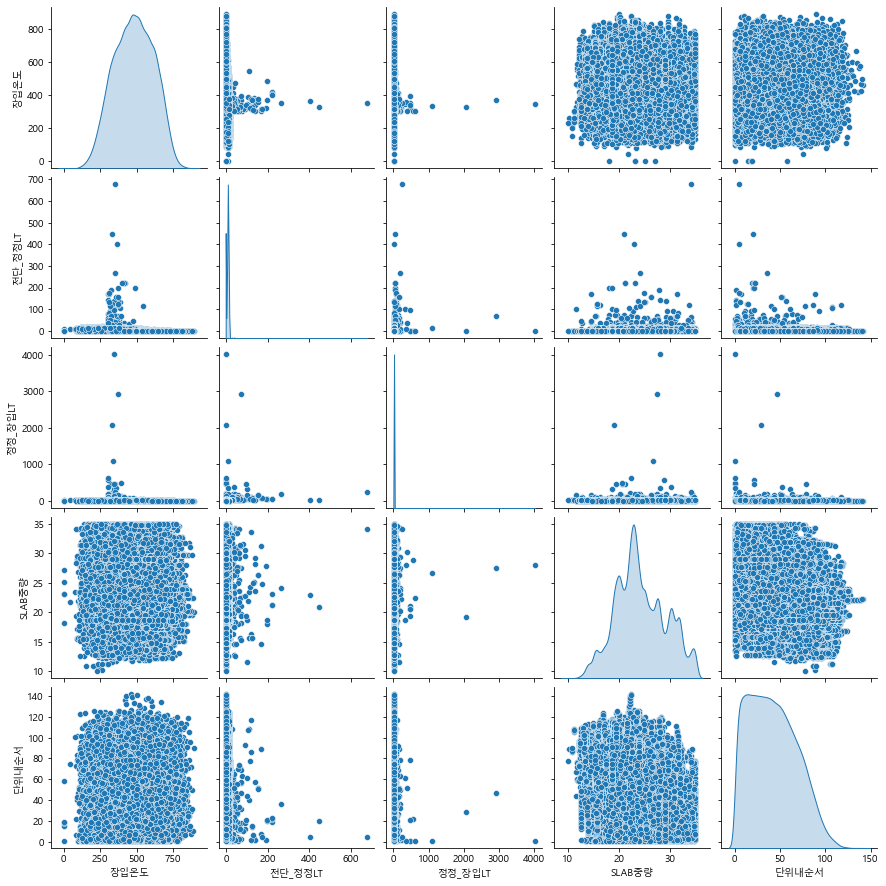

In [49]:
#탐색적 분석

sns.pairplot(df[['장입온도','전단_정정LT','정정_장입LT','SLAB중량','단위내순서']], diag_kind='kde')

In [50]:
stats = df.describe()
stats = stats.transpose()
stats.to_csv('hcr_stats.csv',encoding='cp949')

In [51]:
x_train = df.sample(frac=0.8, random_state=0)
x_test = df.drop(x_train.index)

y_train = x_train.pop('장입온도')
y_test = x_test.pop('장입온도')

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((90610, 24), (22653, 24), (90610,), (22653,))

In [53]:
#수치형 독립변수 표준화(표준변환)

def norm(df):
    result = df.copy()
    for col in df.columns:
        result[col] = (df[col] - stats.loc[col,'mean']) / stats.loc[col, 'std']
    return result

In [54]:
x_train_normed = norm(x_train)
x_test_normed = norm(x_test)

In [55]:
x_train_normed.describe().round(2)
x_test_normed.describe().round(2)

,SLAB폭,SLAB길이,SLAB중량,단위내순서,성분AS,성분C,성분B,성분CA,성분CU,성분CR,...,성분S,성분TOTALAL,성분SOLAL,평균TS,전단_정정LT,정정_장입LT,스카핑여부,성분V,월구분,정정_압연작업지시LT
count,22653.00,22653.00,22653.00,22653.00,22653.00,22653.00,22653.00,22653.00,22653.00,22653.00,...,22653.00,22653.00,22653.00,22653.00,22653.00,22653.00,22653.00,22653.00,22653.00,22653.00
mean,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,-0.01,0.01,-0.01,-0.00,...,-0.00,0.01,0.01,-0.01,0.01,-0.00,0.00,-0.00,0.00,-0.00
std,1.01,1.00,1.00,1.00,1.00,1.00,0.98,1.10,0.98,0.97,...,0.98,1.00,1.00,1.00,1.06,0.44,1.01,1.00,0.99,0.45
min,-2.12,-3.15,-2.92,-1.59,-3.38,-1.10,-0.31,-0.21,-0.90,-0.99,...,-1.76,-2.72,-2.84,-4.71,-0.21,-0.53,-0.34,-0.65,-1.60,-0.89
25%,-0.83,-0.71,-0.72,-0.82,-0.26,-0.44,-0.31,-0.21,-0.46,-0.05,...,-0.47,-0.73,-0.67,-0.54,-0.21,-0.20,-0.34,-0.65,-0.75,-0.19
50%,0.09,0.03,-0.15,-0.09,-0.26,-0.25,-0.31,-0.21,-0.24,-0.05,...,-0.17,-0.12,-0.05,-0.33,-0.21,-0.04,-0.34,-0.65,0.11,-0.04
75%,0.70,0.97,0.71,0.72,0.78,0.21,-0.31,-0.21,0.12,-0.05,...,0.13,0.65,0.57,0.73,-0.21,0.15,-0.34,0.67,0.97,0.14
max,1.99,1.31,2.20,3.85,2.86,3.63,5.58,44.53,20.58,37.61,...,5.89,4.94,4.92,3.17,90.79,31.54,2.92,5.95,1.54,31.45


In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[len(x_train.columns)]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3200      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 14,081
Trainable params: 14,081
Non-trainable params: 0
_________________________________________________________________


In [58]:
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

In [59]:
history = model.fit(x_train_normed, y_train, epochs=50, batch_size=32, validation_split=0.25,callbacks=[tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss')])

Epoch 1/50
2124/2124 [==============================] - 7s 3ms/step - loss: 17928.3359 - mae: 89.3543 - mse: 17928.3359 - val_loss: 6330.9141 - val_mae: 64.4156 - val_mse: 6330.9141
Epoch 2/50
2124/2124 [==============================] - 7s 3ms/step - loss: 6481.8838 - mae: 63.7973 - mse: 6481.8838 - val_loss: 6075.8853 - val_mae: 62.7610 - val_mse: 6075.8853
Epoch 3/50
2124/2124 [==============================] - 8s 4ms/step - loss: 6133.4980 - mae: 62.7070 - mse: 6133.4980 - val_loss: 5884.6611 - val_mae: 62.0791 - val_mse: 5884.6611
Epoch 4/50
2124/2124 [==============================] - 7s 3ms/step - loss: 5907.7793 - mae: 62.0445 - mse: 5907.7793 - val_loss: 6001.9268 - val_mae: 63.2738 - val_mse: 6001.9268
Epoch 5/50
2124/2124 [==============================] - 8s 4ms/step - loss: 5849.4834 - mae: 61.7374 - mse: 5849.4834 - val_loss: 5915.2466 - val_mae: 63.0707 - val_mse: 5915.2466
Epoch 6/50
2124/2124 [==============================] - 8s 4ms/step - loss: 5784.7490 - mae: 61.39

2124/2124 [==============================] - 7s 4ms/step - loss: 5354.8540 - mae: 58.9824 - mse: 5354.8540 - val_loss: 5526.4502 - val_mae: 59.4005 - val_mse: 5526.4502
Epoch 47/50
2124/2124 [==============================] - 8s 4ms/step - loss: 5340.7402 - mae: 58.9068 - mse: 5340.7402 - val_loss: 5467.6162 - val_mae: 59.7815 - val_mse: 5467.6162
Epoch 48/50
2124/2124 [==============================] - 8s 4ms/step - loss: 5345.8921 - mae: 58.9248 - mse: 5345.8921 - val_loss: 5493.7021 - val_mae: 60.2668 - val_mse: 5493.7021
Epoch 49/50
2124/2124 [==============================] - 7s 3ms/step - loss: 5332.0693 - mae: 58.8708 - mse: 5332.0693 - val_loss: 5509.3911 - val_mae: 60.3082 - val_mse: 5509.3911
Epoch 50/50
2124/2124 [==============================] - 7s 3ms/step - loss: 5327.9863 - mae: 58.8095 - mse: 5327.9863 - val_loss: 5429.6411 - val_mae: 59.5954 - val_mse: 5429.6411


In [60]:
model.evaluate(x_test_normed,y_test, verbose=0)

[5415.96044921875, 59.491451263427734, 5415.96044921875]

In [61]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,17928.335938,89.354317,17928.335938,6330.914062,64.415596,6330.914062,0
1,6481.883789,63.797268,6481.883789,6075.885254,62.761009,6075.885254,1
2,6133.498047,62.707035,6133.498047,5884.661133,62.079063,5884.661133,2
3,5907.779297,62.044537,5907.779297,6001.926758,63.273762,6001.926758,3
4,5849.483398,61.737370,5849.483398,5915.246582,63.070747,5915.246582,4
5,5784.749023,61.397121,5784.749023,5835.472168,62.290512,5835.472168,5
6,5754.935059,61.180935,5754.935059,5718.096680,61.638504,5718.096680,6
7,5721.407715,61.038109,5721.407715,5701.688477,61.436508,5701.688477,7
8,5678.796875,60.784554,5678.796875,5694.851074,60.934628,5694.851074,8
9,5653.857910,60.657852,5653.857910,5687.065430,60.856342,5687.065430,9


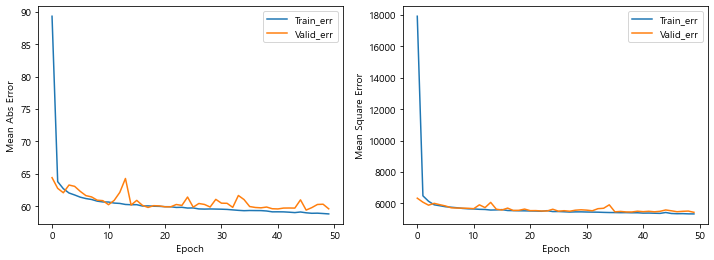

In [62]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(hist['epoch'], hist['mae'],label='Train_err')
plt.plot(hist['epoch'], hist['val_mae'],label='Valid_err')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(hist['epoch'], hist['mse'],label='Train_err')
plt.plot(hist['epoch'], hist['val_mse'],label='Valid_err')
plt.legend()

plt.show()

In [63]:
pred = model.predict(x_test_normed)
df_test = pd.DataFrame({'실제':y_test[:10],'예측':pred[:10,0],'잔차':pred[:10,0]-y_test[:10]})
df_test

,실제,예측,잔차
2,460,507.201202,47.201202
10,418,362.015747,-55.984253
13,365,330.483521,-34.516479
20,577,509.462738,-67.537262
21,521,518.253113,-2.746887
27,345,338.682465,-6.317535
30,448,469.847321,21.847321
43,309,285.644165,-23.355835
46,271,474.422821,203.422821
55,611,480.842987,-130.157013


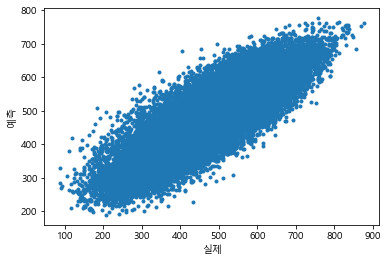

In [64]:
plt.scatter(y_test, pred, marker='.')
plt.xlabel('실제')
plt.ylabel('예측')
plt.show()

In [65]:
from sklearn.metrics import r2_score

r2_score(y_test,pred)

0.7016150481959509

In [66]:
save_path = 'hcr_model.h5'
model.save(save_path, include_optimizer=True)